In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

Pregunta 2 - resistencias en botellas

In [43]:
resistencias = [28.3, 26.8, 26.6, 26.5, 28.1, 24.8, 27.4, 26.2, 29.4, 28.6, 24.9, 25.2, 30.4,
                27.7, 27.0, 26.1, 28.1, 26.9, 28.0, 27.6, 25.6, 29.5, 27.6, 27.3, 26.2, 27.7,
                27.2, 25.9, 26.5, 28.3, 26.5, 29.1, 23.7, 29.7, 26.8, 29.5, 28.4, 26.3, 28.1,
                28.7, 27.0, 25.5, 26.9, 27.2, 27.6, 25.5, 28.3, 27.4, 28.8, 25.0, 25.3, 27.7,
                25.2, 28.6, 27.9, 28.7]

df = pd.DataFrame(resistencias, columns=["Resistencia Máxima"])

In [44]:
n = len(df)

k_sturges = int(1 + 3.322 * math.log10(n))

k_raiz_cuadrada = int(math.sqrt(n))

print(f"Clases según Sturges: {k_sturges}")
print(f"Clases según la raíz cuadrada: {k_raiz_cuadrada}")

Clases según Sturges: 6
Clases según la raíz cuadrada: 7


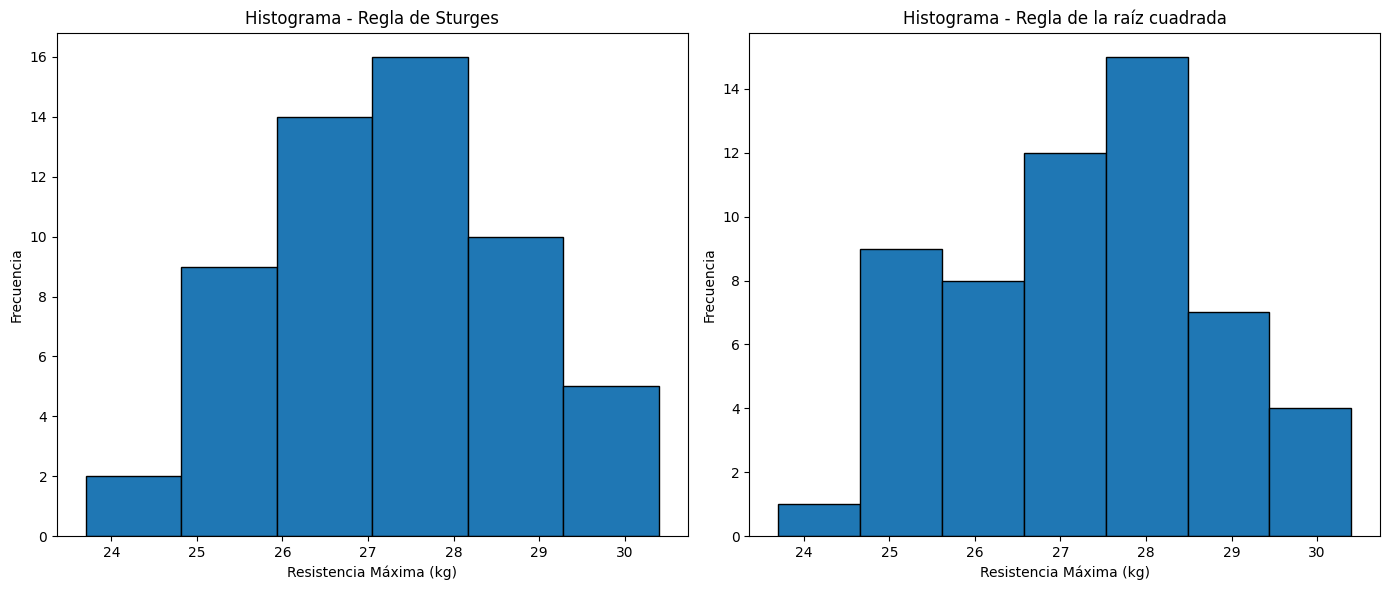

In [45]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df["Resistencia Máxima"], bins=k_sturges, edgecolor='black')
plt.title("Histograma - Regla de Sturges")
plt.xlabel("Resistencia Máxima (kg)")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df["Resistencia Máxima"], bins=k_raiz_cuadrada, edgecolor='black')
plt.title("Histograma - Regla de la raíz cuadrada")
plt.xlabel("Resistencia Máxima (kg)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()




Análisis de los datos:
1. Observando los histogramas, podemos identificar la forma de la distribución.
2. Si la distribución es simétrica, las botellas tienen una resistencia distribuida de manera uniforme.
3. Si está sesgada, puede indicar que la mayoría de las botellas tienen resistencias cercanas a un límite inferior o superior.

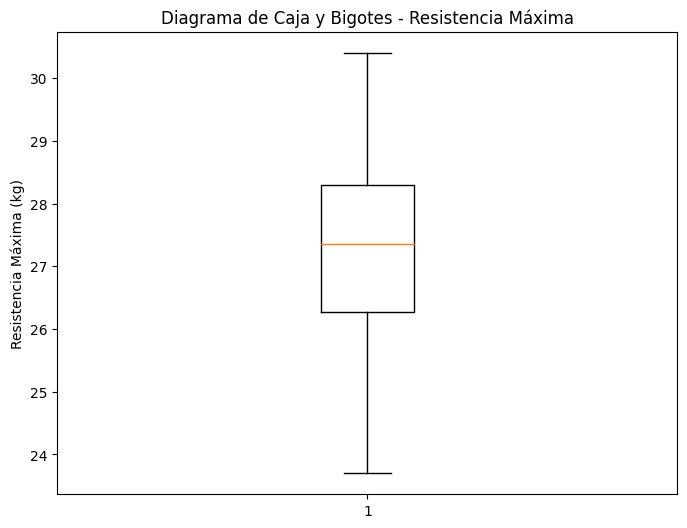

Primer cuartil (Q1): 26.275
Tercer cuartil (Q3): 28.3
Rango intercuartílico (IQR): 2.025000000000002
Límite inferior: 23.237499999999997
Límite superior: 31.337500000000006
Datos atípicos:
Empty DataFrame
Columns: [Resistencia Máxima]
Index: []


In [46]:
# Graficar el diagrama de caja y bigotes
plt.figure(figsize=(8, 6))
plt.boxplot(df["Resistencia Máxima"], vert=True)
plt.title("Diagrama de Caja y Bigotes - Resistencia Máxima")
plt.ylabel("Resistencia Máxima (kg)")
plt.show()

# Cálculo del rango intercuartílico (IQR)
Q1 = np.percentile(df["Resistencia Máxima"], 25)
Q3 = np.percentile(df["Resistencia Máxima"], 75)
IQR = Q3 - Q1

print(f"Primer cuartil (Q1): {Q1}")
print(f"Tercer cuartil (Q3): {Q3}")
print(f"Rango intercuartílico (IQR): {IQR}")

# Cálculo de los límites para identificar datos atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")

# Identificar datos atípicos
outliers = df[(df["Resistencia Máxima"] < lower_bound) | (df["Resistencia Máxima"] > upper_bound)]
print(f"Datos atípicos:\n{outliers}")


In [47]:
mean = np.mean(df["Resistencia Máxima"])
std_dev = np.std(df["Resistencia Máxima"], ddof=1)
n = len(df)

confidence_level = 0.94
alpha = 1 - confidence_level

df_degrees_of_freedom = n - 1

t_critical = stats.t.ppf(1 - alpha/2, df_degrees_of_freedom)

margin_of_error = t_critical * (std_dev / np.sqrt(n))

confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print(f"Resistencia promedio estimada (94% de confianza): {confidence_interval}")

Resistencia promedio estimada (94% de confianza): (26.879344447464373, 27.613512695392767)


In [48]:
mu_0 = 25  # kg

t_score = (mean - mu_0) / (std_dev / np.sqrt(n))

p_value = 2 * (1 - stats.t.cdf(np.abs(t_score), df_degrees_of_freedom))

print(f"t_score: {t_score}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La resistencia promedio es significativamente diferente de 25 kg.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que la resistencia promedio es diferente de 25 kg.")


t_score: 11.752111281692763
p-value: 0.0
Rechazamos la hipótesis nula: La resistencia promedio es significativamente diferente de 25 kg.


In [49]:
confidence_level = 0.98
alpha = 1 - confidence_level

df_degrees_of_freedom = n - 1

t_critical = stats.t.ppf(1 - alpha/2, df_degrees_of_freedom)

margin_of_error = t_critical * (std_dev / np.sqrt(n))

confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print(f"Intervalo de confianza del 98% para la media poblacional: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")


Intervalo de confianza del 98% para la media poblacional: (26.7884, 27.7044)


Pregunta 3 - temperatura ideal hombres y mujeres

In [50]:
hombres = np.array([74, 72, 77, 76, 76, 73, 75, 73, 74, 75])
mujeres = np.array([75, 77, 78, 79, 77, 73, 78, 79, 78, 80])

n1 = len(hombres)
n2 = len(mujeres)
mean1 = np.mean(hombres)
mean2 = np.mean(mujeres)
std_dev1 = np.std(hombres, ddof=1)
std_dev2 = np.std(mujeres, ddof=1)

t_score, p_value = stats.ttest_ind(hombres, mujeres, equal_var=False)

print(f"Estadístico t: {t_score}")
print(f"p-valor: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La temperatura promedio más confortable es diferente entre hombres y mujeres.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que la temperatura promedio más confortable es diferente entre hombres y mujeres.")


Estadístico t: -3.5254179083580257
p-valor: 0.002626225071336037
Rechazamos la hipótesis nula: La temperatura promedio más confortable es diferente entre hombres y mujeres.


In [51]:
var_1 = np.var(hombres, ddof=1)
var_2 = np.var(mujeres, ddof=1)
df = n1 + n2 - 2
f_score = var_1 / var_2

df1 = n1 - 1
df2 = n2 - 1

p_value = 2*min(stats.f.cdf(f_score, df1, df2), 1 - stats.f.cdf(f_score, df1, df2))

print(f"Estadístico F: {f_score}")
print(f"p-valor: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La varianza de temperatura más confortable es diferente entre hombres y mujeres.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que la varianza de temperatura más confortable es diferente entre hombres y mujeres")

Estadístico F: 0.5859375
p-valor: 0.4380709879241654
No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que la varianza de temperatura más confortable es diferente entre hombres y mujeres


Pregunta 4 - discos

In [52]:
actual = np.array([1.88, 1.84, 1.83, 1.90, 2.19, 1.89, 2.27, 2.03, 1.96, 1.98, 2.00, 1.92, 1.83, 1.94, 1.94, 1.95, 1.93, 2.01])
nuevo = np.array([1.87, 1.90, 1.85, 1.88, 2.18, 1.87, 2.23, 1.97, 2.00, 1.98, 1.99, 1.89, 1.78, 1.92, 2.02, 2.00, 1.95, 2.05])

differences = np.array(nuevo) - np.array (actual)
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)
n = len(differences)

t_score = mean_diff / (std_diff / np.sqrt(n))

p_value = 2 * (1 - stats.t.cdf(np.abs(t_score), df=n-1))

print(f"Media de diferencias: {mean_diff}")
print(f"Estadístico t: {t_score}")
print(f"p-valor: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre el método actual y el método nuevo.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que el método actual y el método nuevo son diferentes.")


Media de diferencias: 0.0022222222222222613
Estadístico t: 0.23874497225498748
p-valor: 0.8141576311659824
No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que el método actual y el método nuevo son diferentes.
